In [256]:
import sys
sys.path.append('/Users/vdk/GeneveWork/Code/calibpipe-main-calibpipe/')
from astropy.io import ascii
import numpy as np
import pandas as pd
import matplotlib
import csv
import scipy
import matplotlib.pyplot as plt
from seaborn import histplot
import random
import copy
from os import path, makedirs
from astropy.coordinates import SkyCoord
from astropy.table import Table
import astropy.units as u
from ctapipe.containers import MuonEfficiencyContainer
from ctapipe.coordinates import CameraFrame, TelescopeFrame
from ctapipe.io import EventSource, EventSeeker
from ctapipe.core import TelescopeComponent
from ctapipe.core.traits import (
    List,
    Int,
    FloatTelescopeParameter,
    TelescopeParameter,
    Unicode,
)
from ctapipe.image.cleaning import tailcuts_clean
from ctapipe.image.muon import MuonRingFitter, MuonIntensityFitter
from traitlets.config import Config
from ctapipe.image import ImageProcessor
from ctapipe.image.muon import MuonProcessor
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from ctapipe.calib import CameraCalibrator
from traitlets.config.loader import Config, FileConfigLoader, JSONFileConfigLoader
import pathlib
from calibpipe.throughput import MuonCalibrator
from traitlets.config import Config
from astropy.time import Time
from astropy.coordinates import EarthLocation,SkyCoord, AltAz 
from traitlets.config import Config
import time
from functools import reduce





In [3]:
event_container = {}
counter = 0
for k in range(1,41):
    filename = f'/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k}.simtel.gz'
    source = EventSource(filename)
    event_iterator = iter(source)
    keks = k*1000
    for i,j in enumerate(event_iterator):
        counter += 1
        if len(j.trigger.tels_with_trigger) > 1:
            event_container[keks+i] = j

In [12]:
high_energy_events = {}
for i in event_container:
    if event_container[i].simulation.shower.energy.to_value() > 10:
        print(event_container[i].simulation.shower.energy)
        high_energy_events[i] = event_container[i]

98.62728881835938 TeV
21.727500915527344 TeV
22.911283493041992 TeV
15.286890029907227 TeV
11.10991382598877 TeV
58.70478820800781 TeV
58.70478820800781 TeV
15.620074272155762 TeV
24.700748443603516 TeV
26.378015518188477 TeV
98.62728881835938 TeV
21.727500915527344 TeV
22.911283493041992 TeV
15.286890029907227 TeV
11.10991382598877 TeV
58.70478820800781 TeV
58.70478820800781 TeV
24.700748443603516 TeV
26.378015518188477 TeV
86.7869873046875 TeV
53.517974853515625 TeV
25.187877655029297 TeV
30.99488067626953 TeV
28.408737182617188 TeV
49.99570846557617 TeV
65.84965515136719 TeV
67.1764907836914 TeV
86.7869873046875 TeV
53.517974853515625 TeV
25.187877655029297 TeV
49.99570846557617 TeV
65.84965515136719 TeV
91.91065216064453 TeV
67.1764907836914 TeV
49.17391586303711 TeV
28.48676109313965 TeV
14.382362365722656 TeV
14.382362365722656 TeV
19.419248580932617 TeV
61.056400299072266 TeV
28.118436813354492 TeV
15.642082214355469 TeV
21.537803649902344 TeV
29.206531524658203 TeV
11.468229293

In [17]:
high_energies = []
for i in high_energy_events:
    high_energies.append(high_energy_events[i].simulation.shower.energy.to_value())

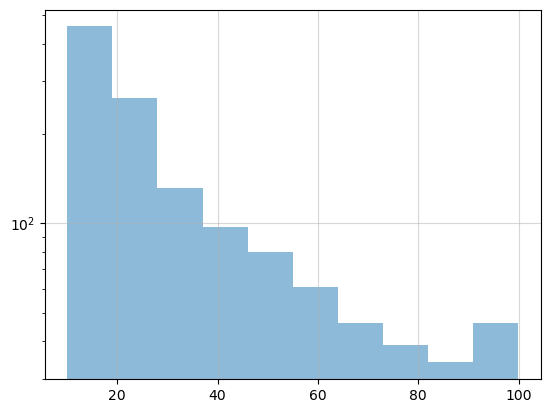

In [34]:
x,y,_ = plt.hist(high_energies, bins = 10, alpha = 0.5, log = True)
plt.grid(alpha = 0.5)

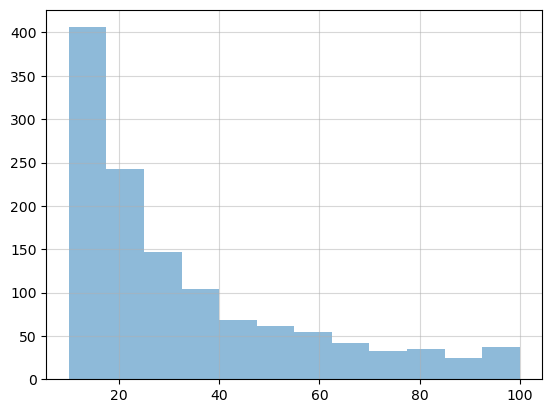

In [38]:
x,y,_ = plt.hist(high_energies, bins = 12, alpha = 0.5, log = False)
plt.grid(alpha = 0.5)

In [49]:
high_energy_events[1018].trigger.tel[3].trigger_pixels

In [60]:
event = high_energy_events[1018]
image_processor = ImageProcessor(source.subarray)
muon_processor = MuonProcessor(source.subarray)
calib = CameraCalibrator(image_extractor_type="GlobalPeakWindowSum", subarray = source.subarray)
calib(event)
image_processor(event)
muon_processor(event)

In [53]:
high_energy_events[1018]

ctapipe.containers.ArrayEventContainer:
                       index.*: event indexing information with default None
                          r0.*: Raw Data with default None
                          r1.*: R1 Calibrated Data with default None
                         dl0.*: DL0 Data Volume Reduced Data with default None
                         dl1.*: DL1 Calibrated image with default None
                         dl2.*: DL2 reconstruction info with default None
                  simulation.*: Simulated Event Information with default None
                                with type <class
                                'ctapipe.containers.SimulatedEventContainer'>
                     trigger.*: central trigger information with default None
                         count: number of events processed with default 0
                    pointing.*: Array and telescope pointing positions with
                                default None
                 calibration.*: Container for calibra

In [210]:
print(high_energy_events[1018].simulation)

{'shower': {'alt': <Angle 1.09385693 rad>,
            'az': <Angle 3.0238533 rad>,
            'core_x': <Quantity -147.92028809 m>,
            'core_y': <Quantity 583.94024658 m>,
            'energy': <Quantity 98.62728882 TeV>,
            'h_first_int': <Quantity 26933.96289062 m>,
            'shower_primary_id': 101,
            'x_max': <Quantity 374.29528809 g / cm2>},
 'tel': {1: {'impact': {'distance': <Quantity 541.90036299 m>,
                        'distance_uncert': <Quantity 0. m>},
             'true_image': array([80, 31, 42, ...,  0,  1,  0], dtype=int32),
             'true_image_sum': 25308,
             'true_parameters': {'concentration': {'cog': 0.0158052789631737,
                                                   'core': 0.4517148727675043,
                                                   'pixel': 0.010747589694958115},
                                 'core': {'psi': <Quantity nan deg>},
                                 'hillas': {'fov_lat': <Quantity 0.0

In [67]:
len(high_energy_events)

1255

In [264]:
flatten_impact = sum(impact, [])

In [254]:
impact = np.array(impact)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1255,) + inhomogeneous part.

In [232]:
impact = []
for i in high_energy_events:
    impact_points = []
    for tel in high_energy_events[i].trigger.tels_with_trigger:
        impact_points.append(high_energy_events[i].simulation.tel[tel].impact.distance.to_value())
    impact.append(impact_points)

In [244]:
impact_xyz = []
impact_min = []
impact_max = []
for i in impact:
    impact_min.append(min(i))
    impact_max.append(max(i))    
    if len(i) > 2:
        impact_xyz.append(i)

Text(0, 0.5, 'events')

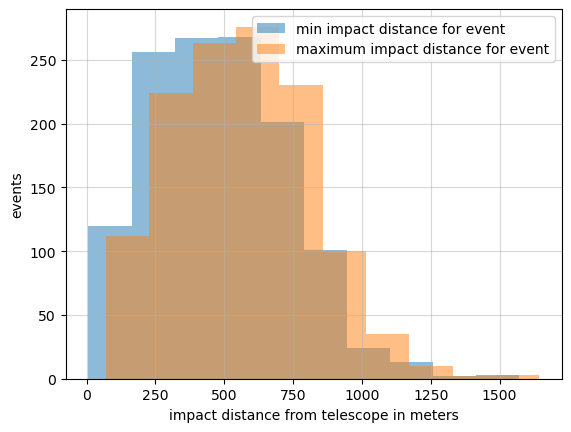

In [269]:
plt.hist(impact_min, alpha = 0.5, label = 'min impact distance for event')
plt.hist(impact_max, alpha = 0.5, label = 'maximum impact distance for event')
#plt.hist(flatten_impact, histtype = 'step', label = 'impact distance for every telescope')
plt.legend()
plt.grid(alpha = 0.5)
plt.xlabel('impact distance from telescope in meters')
plt.ylabel('events')


Text(0, 0.5, 'events')

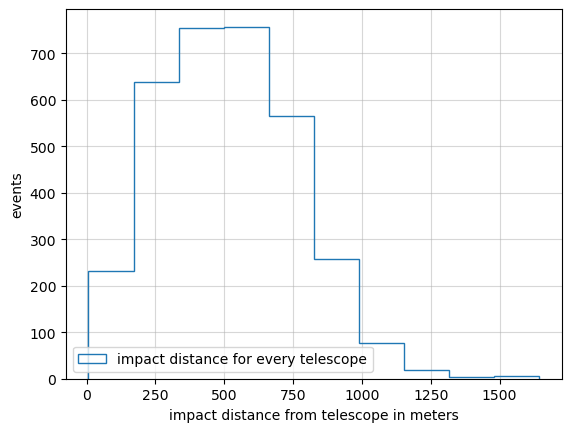

In [270]:
plt.hist(flatten_impact, histtype = 'step', label = 'impact distance for every telescope')
plt.legend()
plt.grid(alpha = 0.5)
plt.xlabel('impact distance from telescope in meters')
plt.ylabel('events')



array([2.96486084e+04, 2.08582103e+04, 1.46740424e+04, 1.03233938e+04,
       7.26265181e+03, 5.10937702e+03, 3.59451812e+03, 2.52879372e+03,
       1.77904172e+03, 1.25158071e+03, 8.80504514e+02, 6.19447229e+02,
       4.35789780e+02, 3.06584199e+02, 2.15686268e+02, 1.51738303e+02,
       1.06750016e+02, 7.51001281e+01, 5.28339894e+01, 3.71694498e+01,
       2.61492273e+01, 1.83963467e+01, 1.29420870e+01, 9.10493902e+00,
       6.40545182e+00, 4.50632485e+00, 3.17026250e+00, 2.23032396e+00,
       1.56906407e+00, 1.10385850e+00, 7.76579876e-01, 5.46334794e-01,
       3.84354161e-01, 2.70398522e-01, 1.90229139e-01, 1.33828857e-01,
       9.41504708e-02, 6.62361717e-02, 4.65980723e-02, 3.27823949e-02,
       2.30628729e-02, 1.62250533e-02, 1.14145517e-02, 8.03029661e-03])

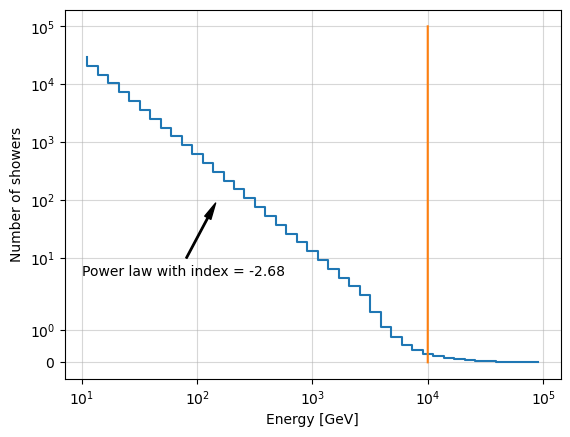

In [167]:
def number_events(E0, E1, k = -2.68, A = 8040987.083198826): #A = 1000100.01):
    return A * (E1**(k+1)-E0**(k+1))/(k+1)

energies = np.logspace(1,5,45)

events = number_events(energies[:-1], energies[1:])
plt.step(0.5*(energies[:-1] + energies[1:]), events)
plt.plot([10000 for i in range(100000)], range(100000))
plt.yscale('symlog')
plt.xscale('symlog')
plt.xlabel("Energy [GeV]")
plt.ylabel("Number of showers")
plt.grid(alpha = 0.5)
#plt.annotate("Power law with index = -2", xy = (1000,210), xytext = (100,10),arrowprops=dict(facecolor='black', shrink=0.05, width = 1, headwidth = 5))
plt.annotate("Power law with index = -2.68", xy = (150,100), xytext = (10,5),arrowprops=dict(facecolor='black', shrink=0.05, width = 1, headwidth = 5))

events

In [188]:
energies[energies >= 10000]

array([ 10000.        ,  12328.46739442,  15199.11082953,  18738.1742286 ,
        23101.29700083,  28480.35868436,  35111.91734215,  43287.61281083,
        53366.99231206,  65793.32246576,  81113.08307897, 100000.        ])

In [169]:
energies[len(energies)-12:]

array([ 10000.        ,  12328.46739442,  15199.11082953,  18738.1742286 ,
        23101.29700083,  28480.35868436,  35111.91734215,  43287.61281083,
        53366.99231206,  65793.32246576,  81113.08307897, 100000.        ])

In [186]:
sum(events[len(events)-12:])

1.2773105631891943

In [191]:
(sum(events[len(events)-12:])/sum(events))

1.277310563189195e-05

In [185]:
sum(events)

99999.99999999994

In [189]:
events

array([2.96486084e+04, 2.08582103e+04, 1.46740424e+04, 1.03233938e+04,
       7.26265181e+03, 5.10937702e+03, 3.59451812e+03, 2.52879372e+03,
       1.77904172e+03, 1.25158071e+03, 8.80504514e+02, 6.19447229e+02,
       4.35789780e+02, 3.06584199e+02, 2.15686268e+02, 1.51738303e+02,
       1.06750016e+02, 7.51001281e+01, 5.28339894e+01, 3.71694498e+01,
       2.61492273e+01, 1.83963467e+01, 1.29420870e+01, 9.10493902e+00,
       6.40545182e+00, 4.50632485e+00, 3.17026250e+00, 2.23032396e+00,
       1.56906407e+00, 1.10385850e+00, 7.76579876e-01, 5.46334794e-01,
       3.84354161e-01, 2.70398522e-01, 1.90229139e-01, 1.33828857e-01,
       9.41504708e-02, 6.62361717e-02, 4.65980723e-02, 3.27823949e-02,
       2.30628729e-02, 1.62250533e-02, 1.14145517e-02, 8.03029661e-03])

In [159]:
A = 100000 / ((100000**(-1.68) - 10**(-1.68))/-1.68)
A

8040987.083198826

In [100]:
0.36*10500

3780.0

In [102]:
1215/18000

0.0675

In [107]:
0.0011329600354456106*18000

20.39328063802099

In [194]:
1215/4e7*100

0.0030375

In [193]:
(1215/4e7)/(sum(events[len(events)-12:])/sum(events))

2.3780434355885665

In [198]:
print(event.pointing.tel[1])

{'altitude': <Quantity 1.0751228 rad>, 'azimuth': <Quantity 3.1895893 rad>}


In [208]:
print(np.rad2deg(event.pointing.tel[1].azimuth.to_value()))
print(np.rad2deg(event.pointing.tel[1].altitude.to_value()))

182.75
61.6


In [205]:
event.pointing.tel[1].azimuth.to_value()

3.1895893